    Year               Champion               Runner-Up
0   2022  Golden State Warriors          Boston Celtics
1   2021        Milwaukee Bucks            Phoenix Suns
2   2020     Los Angeles Lakers              Miami Heat
3   2019        Toronto Raptors   Golden State Warriors
4   2018  Golden State Warriors     Cleveland Cavaliers
5   2017  Golden State Warriors     Cleveland Cavaliers
6   2016    Cleveland Cavaliers   Golden State Warriors
7   2015  Golden State Warriors     Cleveland Cavaliers
8   2014      San Antonio Spurs              Miami Heat
9   2013             Miami Heat       San Antonio Spurs
10  2012             Miami Heat   Oklahoma City Thunder
11  2011       Dallas Mavericks              Miami Heat
12  2010     Los Angeles Lakers          Boston Celtics
13  2009     Los Angeles Lakers           Orlando Magic
14  2008         Boston Celtics      Los Angeles Lakers
15  2007      San Antonio Spurs     Cleveland Cavaliers
16  2006             Miami Heat        Dallas Ma

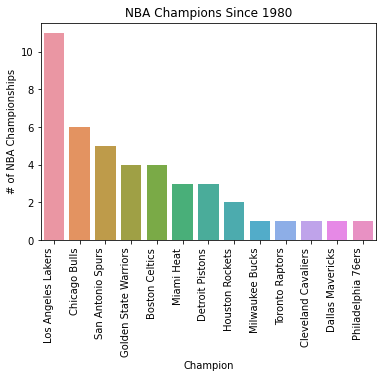

There are 4544 rows and 8 columns in player_data.csv
                     name  year_start  year_end position  height  weight  \
0          Alaa Abdelnaby        1991      1995      F-C  06-Oct     240   
1         Zaid Abdul-Aziz        1969      1978      C-F  06-Sep     235   
2     Kareem Abdul-Jabbar        1970      1989        C  07-Feb     225   
3      Mahmoud Abdul-Rauf        1991      2001        G  06-Jan     162   
4       Tariq Abdul-Wahad        1998      2003        F  06-Jun     223   
...                   ...         ...       ...      ...     ...     ...   
4539           Ante Zizic        2018      2018      F-C  06-Nov     250   
4540             Jim Zoet        1983      1983        C  07-Jan     240   
4541            Bill Zopf        1971      1971        G  06-Jan     170   
4542          Ivica Zubac        2017      2018        C  07-Jan     265   
4543           Matt Zunic        1949      1949      G-F  06-Mar     195   

             birth_date           

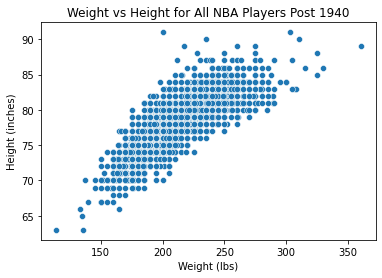

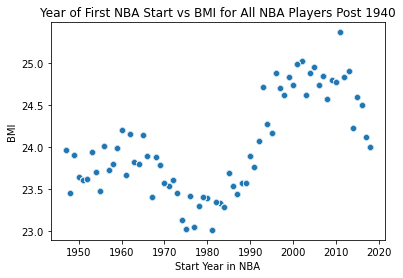

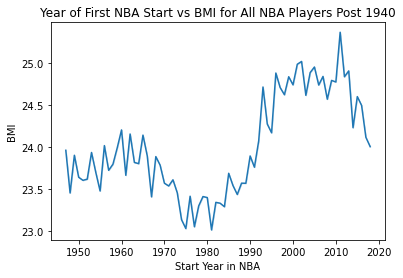

The total number of colleges that NBA players were drafted from since 1940 is: 474


In [53]:
# Required libraries
from urllib.request import urlopen
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import plotly.express as px
import seaborn as sns


# Project Requirement 1 - Data. The project should be real-world dataset and include reference to the source in the report
# Project Requirement 2 - Importing. Retrieve data online using SQL, APIs, or web scraping
# Basketball URL to be scraped
url = "https://www.basketball-reference.com/playoffs/"

# Collect the HTML data
html = urlopen(url)
        
# Create Beautiful Soup object from HTML
soup = BeautifulSoup(html, features="lxml")

# Use getText()to extract the headers into a list
headers = [th.getText() for th in soup.findAll('tr', limit=2)[1].findAll('th')]

# Get rows from table
rows = soup.findAll('tr')[2:]
rows_data = [[td.getText() for td in rows[i].findAll('td')]
                    for i in range(len(rows))]

# Remove empty rows from the web scrape
rows_data.pop(20)
rows_data.pop(40)


# Project Requirement 3 - Preparation. Indexing
# Look at all NBA champions data back to 1980
rows_data = rows_data[0:43]


# Project Requirement 4 - Analysis. Looping
# Add a column for years into rows_data
last_year = 2022
for i in range(0, len(rows_data)):
       rows_data[i].insert(0, last_year)
       last_year -=1

    
# Project Requirement 3 - Preparation. Create pandas DataFrame
nba_finals = pd.DataFrame(rows_data, columns = headers)

# Print only the Year, Champion & Runner Up
print(nba_finals[['Year','Champion', 'Runner-Up']])

# Extract the Year, Champion & Runner Up information from the dataframe
nba_top2 = nba_finals[['Year','Champion', 'Runner-Up']]

# Export full dataframe to a CSV 
nba_finals.to_csv("nba_finals_history.csv", index=False)

# Export dataframe of Finalists to a CSV 
nba_top2.to_csv("nba_winners_runners-up.csv", index=False)


# Project Requirement 3 - Preparation. Drop Duplicates
# Project Requirement 4 - Analysis. Looping
champions_list = nba_finals['Champion']
temp = []
 
for x in champions_list:
    if x not in temp:
        temp.append(x)
 
champions_list = temp
 
print(f'The full list of teams that have won an NBA championship going back to 1980 = {temp}')

# Project Requirement 4 - Analysis. Use NumPy functions
print("The number of different NBA teams that have won a championship since 1980 is:", len(np.unique(champions_list)))


# Project Requirement 3 - Preparation. Sorting, grouping.
# Project Requirement 4 - Analysis. Groupby.
# Project Requirement 4 - Analysis. Use NumPy functions.
print(nba_finals.groupby('Champion')['Champion'].count().sort_values(ascending=False))

# Project Requirement 5 - Generate at least 2 charts using Matplotlib or Seaborn
fig, ax = plt.subplots()
sns.countplot(x=nba_finals['Champion'], order = nba_finals['Champion'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set_title("NBA Champions Since 1980")
ax.set_xlabel("Champion")
ax.set_ylabel("# of NBA Championships")
plt.show()
fig.savefig("NBA_Champions_Since_1980.png")


# Project Requirement 1 - Data. The project should be real-world dataset and include reference to the source in the report

# NBA player data taken from the following location in Kaggle:
# https://www.kaggle.com/code/johndkearns/starter-nba-players-stats-since-1950-d424e5b4-0/data?select=player_data.csv
# player_data.csv file saved from this location

# Project Requirement 2 - Importing. Import data from a flat file (.csv, .xls, .xlsx, .txt, etc.)
player_data = pd.read_csv("player_data.csv", delimiter=',')
player_data.dataframeName = "player_data.csv"
nRow, nCol = player_data.shape
print(f"There are {nRow} rows and {nCol} columns in player_data.csv")
print(player_data)


# Project Requirement 3 - Preparation. Replace Missing Values.
player_data.college = player_data.college.fillna("No Uni Info")

# Height information in player_data.csv is not in useable format
# Import a csv file that will convert height in '5ft 11 inches' format to inches
inches_data = pd.read_csv("Height_in_inches.csv", delimiter=',')
inches_data.dataframeName = "Height_in_inches.csv"

# Project Requirement 3 - Preparation. Merge DataFrames
merged_data = player_data.merge(inches_data, on = 'height', validate = 'many_to_one')

# Project Requirement 3 - Preparation. Sorting.
sorted_height = merged_data.sort_values('inches')
print(sorted_height)

# Project Requirement 4 - Analysis. Define a custom function to create reusable code.
def bmi(merged_data):
    bmi_calc = merged_data['weight'] * 703 / merged_data['inches'] ** 2
    return round(bmi_calc,2)

merged_data['bmi'] = merged_data.apply(bmi, axis=1)

bmi_average = merged_data.groupby('year_start')['bmi'].mean()
print(bmi_average)

merged_data_bmi = merged_data.merge(bmi_average, on = 'year_start', validate = 'many_to_one')
print(merged_data_bmi)

#merged_data['bmi_avg'] = merged_data.apply(bmi_avg, axis=1)


#bmi_average = merged_data.groupby('year_start')['bmi'].mean()
#print(bmi_average)


# Project Requirement 4 - Analysis. Dictionary or Lists.
# Iterating over the list for a selected college and printing the mode values for selected options. 
k=1; 
for i in merged_data.loc[merged_data.college == 'University of Notre Dame', 'weight'].mode():
    print(f"The #{k} mode value for weight of University of Notre Dame players is {i} lbs")
    k=k+1

lightest_1980 = merged_data.loc[merged_data.year_start == '1980', 'weight'].max()
lightest_1980 = str(lightest_1980)

print("The lightest NBA player (in lbs) with a career start year of 1980 was:", lightest_1980)

#merged_data.inches = merged_data.inches.astype(str)

#mean_height = merged_data["inches"].mean()
#df.index = df.index.astype(int)
#print(type(mean_height))
#print(mean_height)

#print(f"The mean height of players is {merged_data.loc[merged_data.year_start == '1980', 'height'].max()}")



#list_of_words=['Cars', 'Cats', 'Flowers', 'Cats', 'Horses', '', 'Horses', 'Horses', 'Horses']
#fdist = zip(np.unique('college', return_counts=True))
#print("The elements with their counts are -", fdist)
#print("The most common word is -",list(fdist)[-1])


    

#sorted_height = player_data.sort_values("height")
#print(sorted_height)

#player_data.sort_values(by=['year_start'], inplace=False)
#print(player_data.head())

fig, ax = plt.subplots()
sns.scatterplot(x=merged_data['weight'], y=merged_data['inches'])
ax.set_title("Weight vs Height for All NBA Players Post 1940")
ax.set_xlabel("Weight (lbs)")
ax.set_ylabel("Height (inches)")
plt.show()
fig.savefig("Weight vs Height.png", dpi=300)


fig, ax = plt.subplots()
sns.lineplot(x=merged_data_bmi['year_start'], y=merged_data_bmi['bmi_y'])
ax.set_title("Year of First NBA Start vs BMI for All NBA Players Post 1940")
ax.set_xlabel("Start Year in NBA")
ax.set_ylabel("BMI")
plt.show()
fig.savefig("BMI vs Start Year.png", dpi=300)




#Find the unique values of the "college" column
colleges = merged_data['college'].unique()

#Print out the unique values of the "college" column
print("The total number of colleges that NBA players were drafted from since 1940 is:", len(set(colleges)))



